In [4]:
ls ../figs/

anatomy.png   d3.png        protoviz.png


![anatomy](../figs/anatomy.png)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.0.2'

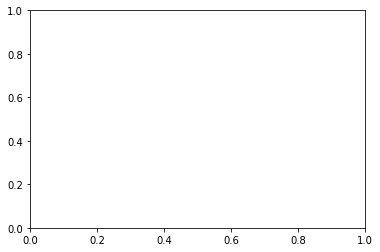

In [6]:
fig1, ax = plt.subplots()

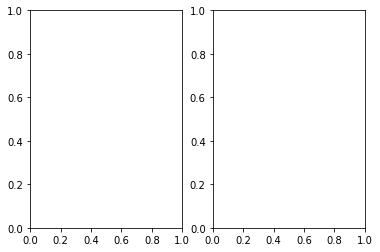

In [7]:
fig2, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

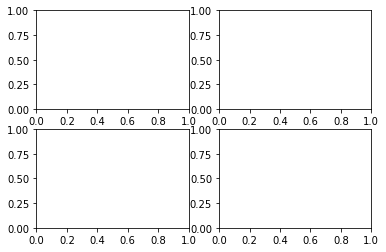

In [8]:
fig2, axes = plt.subplots(nrows=2, ncols=2)

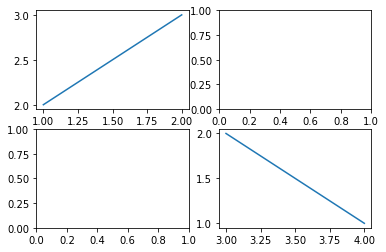

In [9]:
fig2, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].plot([1,2],[2,3])
axes[1,1].plot([3,4], [2,1])
axes[0,1]

In [12]:
ls ../data

NEH_Evaluators.csv     NEH_Grants1980s.csv    NEH_StateCouncils.csv
NEH_Grants.csv         NEH_Grants1990s.csv    gc.csv
NEH_Grants1960s.csv    NEH_Grants2000s.csv
NEH_Grants1970s.csv    NEH_Grants2010s.csv


In [13]:
import pandas as pd
pd.__version__

'0.20.3'

In [51]:
df = pd.read_csv("../data/NEH_Grants.csv")

In [52]:
df.info?

In [17]:
#lets see what data is suited to what graph
# object so we only get string data 
df.describe()

,Unnamed: 0,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,DisciplineCount,OriginalAmount,ParticipantCount,SupplementAmount,SupplementCount,Unnamed: 0.1,YearAwarded
count,63734.000000,6.373400e+04,6.373400e+04,6.373400e+04,6.373400e+04,63734.000000,6.373400e+04,63734.000000,1.291000e+03,63734.000000,63734.000000,63734.000000
mean,31866.500000,1.627890e+04,6.874736e+04,1.515802e+04,6.697797e+04,1.155396,7.341389e+04,0.996831,4.816084e+05,0.030125,7065.272963,1989.500612
std,18398.565365,8.883376e+04,2.054341e+05,8.459079e+04,1.951743e+05,0.460904,1.615286e+05,0.366983,6.532164e+05,0.228998,4922.332543,12.405485
min,0.000000,0.000000e+00,0.000000e+00,-7.794010e+03,-1.041770e+03,0.000000,-2.864249e+06,0.000000,1.090000e+02,0.000000,0.000000,1966.000000
25%,15933.250000,0.000000e+00,3.411500e+03,0.000000e+00,3.000000e+03,1.000000,4.000000e+03,1.000000,1.200000e+04,0.000000,2985.000000,1979.000000
50%,31866.500000,0.000000e+00,1.900150e+04,0.000000e+00,1.800000e+04,1.000000,2.087950e+04,1.000000,2.045760e+05,0.000000,6237.000000,1987.000000
75%,47799.750000,0.000000e+00,5.041525e+04,0.000000e+00,5.040000e+04,1.000000,6.320238e+04,1.000000,8.028000e+05,0.000000,10519.000000,1998.000000
max,63733.000000,6.000000e+06,8.711590e+06,6.000000e+06,6.544450e+06,5.000000,6.000000e+06,9.000000,8.495094e+06,7.000000,19736.000000,2017.000000


In [23]:
df.head()

,Unnamed: 0,AppNumber,ApplicantType,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,BeginGrant,CouncilDate,Discipline,...,PrimaryDiscipline,Program,ProjectDesc,ProjectTitle,Supplement,SupplementAmount,SupplementCount,ToSupport,Unnamed: 0.1,YearAwarded
0,0,FB-10007-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'English'},...,English,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},0,1968
1,1,FB-10009-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'History of Religion'},...,History of Religion,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},1,1968
2,2,FB-10015-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,"{'Name': 'History, General'}",...,"History, General",Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},2,1968
3,3,FB-10019-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,"{'Name': 'History, General'}",...,"History, General",Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},3,1968
4,4,FB-10023-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'Psychology'},...,Psychology,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},4,1968


In [29]:
df.columns

Index(['Unnamed: 0', 'AppNumber', 'ApplicantType', 'ApprovedMatching',
       'ApprovedOutright', 'AwardMatching', 'AwardOutright', 'BeginGrant',
       'CouncilDate', 'Discipline', 'DisciplineCount', 'Division', 'EndGrant',
       'InstCity', 'InstCountry', 'InstPostalCode', 'InstState', 'Institution',
       'OrganizationType', 'OriginalAmount', 'Participant', 'ParticipantCount',
       'PrimaryDiscipline', 'Program', 'ProjectDesc', 'ProjectTitle',
       'Supplement', 'SupplementAmount', 'SupplementCount', 'ToSupport',
       'Unnamed: 0.1', 'YearAwarded'],
      dtype='object')

In [24]:
# only 2 applicant types, so perfect for pie chart
#I = individual, O = organization

at_freq = df['ApplicantType'].value_counts()
at_freq

O    37308
I    26426
Name: ApplicantType, dtype: int64

/Users/hannah/anaconda/envs/summer/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


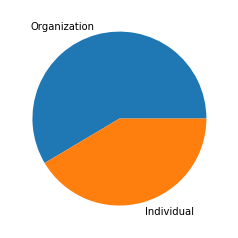

In [27]:
fig, ax = plt.subplots()
ax.pie(at_freq, labels=['Organization', 'Individual'])
ax.set_aspect('equal')
fig.show() # look by dollar amount

In [ ]:
ax.pie?

In [32]:
# bar graph?
freq = df['Division'].value_counts()
freq

Research Programs                    27331
Public Programs                      10485
Education Programs                   10041
Preservation and Access               5965
Fellowships and Seminars              5452
Federal/State Partnership             1878
Challenge Grants                      1727
Digital Humanities                     464
Miscellaneous Humanities Projects      382
Research/Education                       5
Agency-wide Projects                     4
Name: Division, dtype: int64

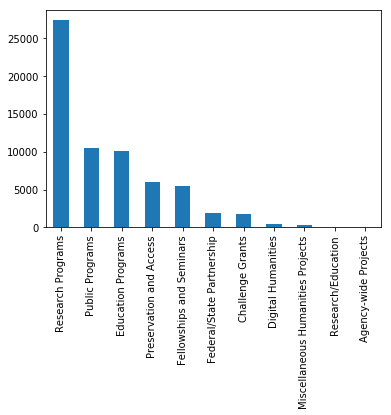

In [34]:
freq.plot.bar()

In [ ]:
list(range(-1, freq.shape[0], 2))

/Users/hannah/anaconda/envs/summer/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


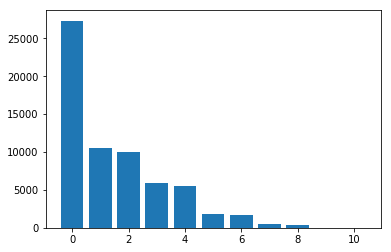

In [31]:
fig, ax = plt.subplots()

index = range(0, freq.shape[0])
ax.bar(index, freq)
fig.show()

In [ ]:
fig, ax = plt.subplots()

index = range(0, freq.shape[0])
ax.bar(index, freq)

ax.set_xticks(index)
ax.set_xticklabels(freq.keys(), rotation=90)

ax.set_xlabel("NEH Grant Divisions")
ax.set_ylabel("Counts")
fig.show()

In [ ]:
import matplotlib.ticker as mticker


def major_formatter(x, pos):
    """x is the index position"""
    label = freq.keys()[x]
    label = label.replace(" ", "\n")
    label = label.replace("/", "\n")
    return label

fig, ax = plt.subplots(figsize=(15,5))

index = range(0, freq.shape[0])
ax.bar(index, freq)
ax.set_xticks(index)
ax.set_ylabel("Counts")
ax.set_xlabel("NEH Grant Divisions")
ax.xaxis.set_major_formatter(mticker.FuncFormatter(major_formatter))
fig.show()

In [ ]:
# what about quantative oriented plots?
df.describe()

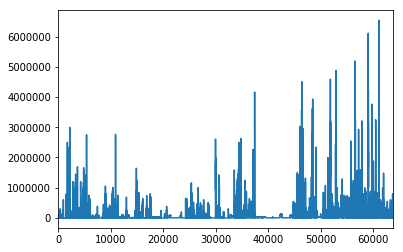

In [53]:
fig, ax = plt.subplots()
df['AwardOutright'].plot(ax=ax)

In [ ]:
#time series, yes?
df.info()

In [54]:
df[df['BeginGrant'].str.contains("9999-09-01")]

,Unnamed: 0,AppNumber,ApplicantType,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,BeginGrant,CouncilDate,Discipline,...,PrimaryDiscipline,Program,ProjectDesc,ProjectTitle,Supplement,SupplementAmount,SupplementCount,ToSupport,Unnamed: 0.1,YearAwarded
237,237,FB-20271-67,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1967-01-12,{'Name': 'British Literature'},...,British Literature,Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},237,1967
689,689,FB-20273-66,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1966-09-15,{'Name': 'Classics'},...,Classics,Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},689,1966
690,690,FB-20275-67,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1967-01-12,{'Name': 'German Literature'},...,German Literature,Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},690,1967
691,691,FB-20277-67,I,0.0,8140.0,0.0,8140.0,9999-09-01T00:00:00,1967-01-12,"{'Name': 'Philosophy, General'}",...,"Philosophy, General",Fellowships for College Teachers and Independe...,{},Title not available,NaN,NaN,0,{},691,1967


In [56]:
#lets sort on date first
ds = df.sort_values(by="CouncilDate")

In [58]:
ds.head()

,Unnamed: 0,AppNumber,ApplicantType,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,BeginGrant,CouncilDate,Discipline,...,PrimaryDiscipline,Program,ProjectDesc,ProjectTitle,Supplement,SupplementAmount,SupplementCount,ToSupport,Unnamed: 0.1,YearAwarded
47,47,EH-10058-66,O,0.0,14000.0,0.0,14000.0,1966-06-01T00:00:00,1966-03-03,"[{'Name': 'Ancient Languages'}, {'Name': 'Anci...",...,Ancient Literature,Institutes for College and University Teachers,A six-week summer training institute for papyr...,Summer institute in papyrology to be conducted...,NaN,NaN,0,{},47,1966
1002,1002,RX-10004-66,O,0.0,24088.0,0.0,24088.0,1966-06-01T00:00:00,1966-03-03,"{'Name': 'Interdisciplinary Studies, General'}",...,"Interdisciplinary Studies, General",Conferences,{},To assist in defraying the expenses of Scholar...,NaN,NaN,0,{},1002,1966
585,585,ES-10001-66,O,0.0,32500.0,0.0,32500.0,1966-07-01T00:00:00,1966-05-06,{'Name': 'Classical Languages'},...,Classical Languages,Institutes for School Teachers,{},Conference to Analyze Present Situation of Lat...,NaN,NaN,0,{},585,1966
414,414,RE-10001-66,O,0.0,300000.0,0.0,300000.0,1966-08-01T00:00:00,1966-05-06,"{'Name': 'Literature, General'}",...,"Literature, General",Editions,{},Support of Standard Editions of American Authors,NaN,NaN,0,{},414,1966
553,553,EO-10005-66,O,0.0,20000.0,0.0,20000.0,1966-07-01T00:00:00,1966-05-06,"{'Name': 'Interdisciplinary Studies, General'}",...,"Interdisciplinary Studies, General",Institutional Planning and Development,{},To Support the Educational Activities,NaN,NaN,0,{},553,1966


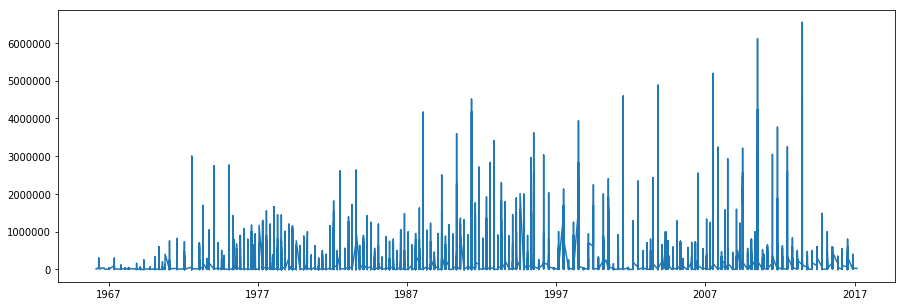

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['CouncilDate'], ds['AwardOutright'], '-')

In [60]:
df['date'] = pd.to_datetime(df['CouncilDate'])

In [65]:
df[df['date'].dt.month==11]

,Unnamed: 0,AppNumber,ApplicantType,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,BeginGrant,CouncilDate,Discipline,...,Program,ProjectDesc,ProjectTitle,Supplement,SupplementAmount,SupplementCount,ToSupport,Unnamed: 0.1,YearAwarded,date
0,0,FB-10007-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'English'},...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},0,1968,1967-11-01
1,1,FB-10009-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'History of Religion'},...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},1,1968,1967-11-01
2,2,FB-10015-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,"{'Name': 'History, General'}",...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},2,1968,1967-11-01
3,3,FB-10019-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,"{'Name': 'History, General'}",...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},3,1968,1967-11-01
4,4,FB-10023-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'Psychology'},...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},4,1968,1967-11-01
5,5,FB-10045-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,"{'Name': 'Political Science, General'}",...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},5,1968,1967-11-01
6,6,FB-10047-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'English'},...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},6,1968,1967-11-01
7,7,FB-10051-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'U.S. History'},...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},7,1968,1967-11-01
8,8,FB-10063-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,{'Name': 'U.S. History'},...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},8,1968,1967-11-01
9,9,FB-10067-68,I,0.0,8387.0,0.0,8387.0,1969-01-01T00:00:00,1967-11-01,"{'Name': 'History, General'}",...,Fellowships for Younger Scholars,{},Title not available,NaN,NaN,0,{},9,1968,1967-11-01


In [62]:
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['CouncilDate'], ds['AwardOutright'], '-', label="Outright")
ax.plot_date(ds['CouncilDate'], ds['AwardMatching'], '-', label="Matching")
ax.legend(ncol=2)
ax.set_ylabel("Awards")

In [ ]:
#lets add inflation
import datetime
from pandas_datareader import data as pddata

start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2016,3, 27)

cpium=pddata.DataReader("CPIAUCSL", "fred", start, end)

inflation = cpium/cpium.ix['2016-03-01']
monthly = inflation.index.strftime("%Y-%m")
monthly_inflation = inflation.reindex(monthly)
ds['date'] = ds['CouncilDate'].str.rpartition("-")[0]
ds['inflation'] = monthly_inflation.loc[ds['date']]['CPIAUCSL'].values

In [ ]:
CUNY = ds[ds['Institution'].str.contains("CUNY Research Foundation, Graduate School and University Center")]

In [ ]:
CUNY.to_csv("gc.csv")

In [ ]:
import matplotlib.dates as mdates
locator = mdates.YearLocator(4, month=1, day=1)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot_date(ds['CouncilDate'], ds['AwardOutright']/ds['inflation'], '-', label="Outright")
ax.plot_date(ds['CouncilDate'], ds['AwardMatching']/ds['inflation'], '-', label="Matching")
ax.legend(ncol=2)
ax.set_ylabel("Awards in Millions (Adjusted for Inflation)")
ax.xaxis.set_major_locator(locator)
ax.set_xlim(('1965-01-01', '2017-01-01'))

def encode_y(x, pos):
    return x/1e6
y_formatter = mticker.FuncFormatter(encode_y)
ax.yaxis.set_major_formatter(y_formatter)

In [ ]:
1e6

In [ ]:
# compare the two?
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(ds['AwardMatching'], ds['AwardOutright'])
ax.set_xlabel("Matching")
ax.set_ylabel("Outright")

In [ ]:
ds[["AwardMatching", "AwardOutright"]].corr()

In [ ]:
#search for 
funds = ds[["BeginGrant","ApprovedOutright", "ApprovedMatching"]]
funds[(funds['ApprovedOutright']>500) & (funds['ApprovedMatching']<1000)]

In [ ]:
ds['TotalAwardAdj'] = (ds['AwardMatching'] + ds['AwardOutright'])/ds['inflation']

In [68]:
df['InstCountry'].unique()

array(['USA', '{}', 'Canada', 'United Kingdom', 'Spain', 'Israel',
       'Germany', 'Australia', 'West Africa', 'Austria', 'Hungary',
       'China', 'England', 'India', 'South Africa', 'Denmark', 'CANADA',
       'Egypt', 'France', 'Switzerland', 'Lebanon', 'New Zealand',
       'Cyprus', 'Argentina', 'Norway', 'Brazil', 'Finland',
       'Bosnia and Herzegovina', 'Italy', 'Czech Republic', 'Netherlands',
       'Poland', 'Thailand', 'Greece'], dtype=object)

In [66]:
# what about more complicated relationships?

apdiv = ds.groupby(["InstCountry", "Division"]).sum()
apdiv.head()

,,Unnamed: 0,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,DisciplineCount,OriginalAmount,ParticipantCount,SupplementAmount,SupplementCount,Unnamed: 0.1,YearAwarded
InstCountry,Division,,,,,,,,,,,,
Argentina,Research Programs,47062,0.0,86500.0,0.0,86500.0,1,86500.0,1,NaN,0,11210,1995
Australia,Research Programs,159362,0.0,79500.0,0.0,79500.0,5,79500.0,4,NaN,0,24502,9948
Austria,Education Programs,11196,0.0,105789.0,0.0,105789.0,1,105789.0,1,NaN,0,10190,1976
Bosnia and Herzegovina,Research Programs,54890,0.0,5000.0,0.0,5000.0,1,5000.0,1,NaN,0,6392,2006
Brazil,Research Programs,54187,0.0,40000.0,0.0,40000.0,1,40000.0,1,NaN,0,5689,2005


In [73]:
df[(df['date'].dt.month<5) & (df['date'].dt.month>3)].merge

,Unnamed: 0,AppNumber,ApplicantType,ApprovedMatching,ApprovedOutright,AwardMatching,AwardOutright,BeginGrant,CouncilDate,Discipline,...,Program,ProjectDesc,ProjectTitle,Supplement,SupplementAmount,SupplementCount,ToSupport,Unnamed: 0.1,YearAwarded,date
1927,1927,EP-*1199-78,O,0.0,32926.6,0.0,32926.6,1978-10-01T00:00:00,1979-04-01,{'Name': 'Unknown'},...,Pilot Grants - Education,The objective of this program—aside from a det...,Adult Liberal Studies Course Development Project,NaN,NaN,0,{},921,1978,1979-04-01
26699,26699,RC-*1192-80,O,0.0,1200.0,0.0,1200.0,1980-05-01T00:00:00,1980-04-01,"{'Name': 'Interdisciplinary Studies, General'}",...,Reference Materials - Access,{},Pacifica Tape Library,NaN,NaN,0,To support consultants who will make recommend...,10584,1980,1980-04-01


In [ ]:
mat = apdiv['TotalAwardAdj'].unstack()
mat

In [ ]:
countries = mat.index.values
divisions = mat.keys()
countries, divisions

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

sm = ax.imshow(mat.values.T)

ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=90)
ax.set_xlabel("Countries")

ax.set_yticks(range(len(divisions)))
ax.set_yticklabels(divisions, rotation=0)
ax.set_ylabel("Divisions")

cb = fig.colorbar(sm, fraction=.015)
cb.set_label("Total Awarded")

In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as mcm

cmap = mcm.viridis_r
bounds = [5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(10,10))

sm = ax.imshow(mat.values.T, cmap=cmap, norm=norm)

ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries, rotation=90)
ax.set_xlabel("Countries")

ax.set_yticks(range(len(divisions)))
ax.set_yticklabels(divisions, rotation=0)
ax.set_ylabel("Divisions")

cb = fig.colorbar(sm, fraction=.015)
cb.set_label("Total Awarded")

In [ ]:
df[df['Division'].str.contains("Challenge Grants")][['Institution', 'ProjectTitle', 'ProjectDesc',]]

In [ ]:
df.keys()

In [ ]:
mat = ds.groupby(["OrganizationType", "Division"])['TotalAwardAdj'].sum().unstack()
mat

In [ ]:
programs = mat.index.values
divisions = mat.keys()
print(divisions, programs)

In [ ]:
import matplotlib.colors as mcolors

cmap = mcm.viridis_r
bounds = [5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(10,10))

sm = ax.imshow(mat.values.T, cmap=cmap, norm=norm)

ax.set_xticks(range(len(programs)))
ax.set_xticklabels(programs, rotation=90)
ax.set_xlabel("Organization Type")

ax.set_yticks(range(len(divisions)))
ax.set_yticklabels(divisions, rotation=0)
ax.set_ylabel("Divisions")

cb = fig.colorbar(sm, fraction=.015)
cb.set_label("Total Awarded")

In [ ]:
# histogram of funding awards....
1) ask questions on dates
2) what happened to matches
3) do they have interenal heirarchal orderings for programs?
a) which programs come from which divisions?

data types - categorical, qualitative, maps, time-series, financial 